In [1]:
import matplotlib.pyplot as plt
from pathlib import Path
import os
import SimpleITK as sitk

from dataset import *
from utils import *


In [2]:
sample_img = '/Users/moritz/Documents/Master/OPTIMA_Masterarbeit/practical/data/RETOUCH/TrainingSet-Release/Cirrus/03a60d9078d35b1488e6030880a29014/reference.mhd'
itk_image = sitk.ReadImage(sample_img)
image_array = sitk.GetArrayViewFromImage(itk_image)

# print the image's dimensions
print("Size of unprocessed input image: ", image_array.shape)

Size of unprocessed input image:  (128, 1024, 512)


In [3]:
name_dir = Path(Path.cwd() / 'data/RETOUCH/TrainingSet-Release/')
train_dir = Path(Path.cwd() / 'data/Retouch-Preprocessed/train')

In [4]:
data = {}
for scanner in os.listdir(name_dir):
    data[scanner] = os.listdir(name_dir / scanner)

for scanner, vals in data.items():
    print("Scanner: ", scanner, "; Number of folders: ", len(vals))

print("Preprocessed Retouch folders: ", len(os.listdir(train_dir)))

Scanner:  Topcon ; Number of folders:  22
Scanner:  Spectralis ; Number of folders:  24
Scanner:  Cirrus ; Number of folders:  24
Preprocessed Retouch folders:  70


Number of domains:  3


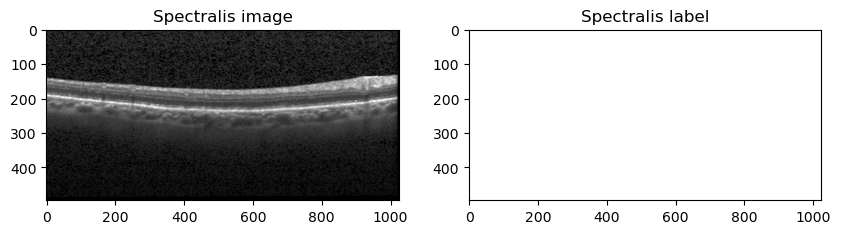

In [6]:
ds_raw = OCTDatasetPrep(train_dir, generate_empty_labels=False, source_domain=SOURCE_DOMAIN)
train_ds, _, _ = ds_raw.get_datasets()

print("Number of domains: ", ds_raw.num_domains)

# plot the first spectralis image and label
which_image = 10
img = cv2.imread(train_ds[which_image]['img'], cv2.IMREAD_GRAYSCALE)
label = cv2.imread(train_ds[which_image]['label'], cv2.IMREAD_GRAYSCALE)

remapped_label = map_grayscale_to_channels(label)

fig, ax = plt.subplots(1, 2, figsize=(10, 5))
ax[0].imshow(img, cmap='gray')
ax[0].set_title('Spectralis image')
ax[1].imshow(remapped_label)
ax[1].set_title('Spectralis label')
plt.show()